In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from tqdm import tqdm
from cp_functions import *
from scipy.optimize import minimize

# Comparison of policies

In [2]:
T = 30
init = [1, 1, 1]
W_current = [2, 2, 2]
W_bar = [2, 2, 2]
Q = [0.6, 0.7, 0.5]
C = [6, 4, 3, 4, 6]
D = [100, 100, 100]
alpha = [0.5, 0.5, 0.5]

In [3]:
upper = solve_cp_post(T, init, W_current, W_bar, Q, C, D, alpha)[0]
print("rel is "+str(upper))

rel is 323.520494439257


The Myopic Policy

In [5]:
T = 30
my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = myopic_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of myopic is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [04:19<00:00,  1.54it/s]


sigma = 0.1, optimality gap of myopic is: 11.401668532083704 +- 0.015496018275286056


100%|██████████| 400/400 [04:11<00:00,  1.59it/s]


sigma = 0.2, optimality gap of myopic is: 12.005599689895234 +- 0.05334801905714205


100%|██████████| 400/400 [04:14<00:00,  1.57it/s]


sigma = 0.3, optimality gap of myopic is: 13.92682047821421 +- 0.13651943488775112


100%|██████████| 400/400 [04:07<00:00,  1.61it/s]


sigma = 0.4, optimality gap of myopic is: 16.7393893696094 +- 0.26226986034593697


100%|██████████| 400/400 [04:12<00:00,  1.59it/s]


sigma = 0.5, optimality gap of myopic is: 20.37330959385332 +- 0.37805996400213815


  7%|▋         | 27/400 [00:17<03:56,  1.58it/s]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


sigma = 0.75, optimality gap of myopic is: 29.162374293247353 +- 0.5828905111648925


100%|██████████| 400/400 [04:26<00:00,  1.50it/s]


sigma = 1.0, optimality gap of myopic is: 34.65782484111173 +- 0.6615687497411535


100%|██████████| 400/400 [04:20<00:00,  1.53it/s]

sigma = 2.0, optimality gap of myopic is: 42.396547307764195 +- 0.8489865804329587


In [5]:
T = 30
my_sigma = [1e-8]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = myopic_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of myopic is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [04:05<00:00,  1.63it/s]

sigma = 1e-08, optimality gap of myopic is: 11.357676070885248 +- 1.4061701726222978e-09


In [6]:
T = 30
my_sigma = [50.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = myopic_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of myopic is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [04:21<00:00,  1.53it/s]

sigma = 50.0, optimality gap of myopic is: 44.835870737540574 +- 0.877526311253225


The Update Policy

In [7]:
T = 30
my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of update is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [1:16:43<00:00, 11.51s/it]


sigma = 0.1, optimality gap of update is: 0.6751724000587274 +- 0.0284472199839743


100%|██████████| 400/400 [1:17:01<00:00, 11.55s/it]


sigma = 0.2, optimality gap of update is: 1.785608100718548 +- 0.05978098879254324


 15%|█▍        | 59/400 [11:29<1:06:03, 11.62s/it]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [1:12:19<00:00, 10.85s/it]


sigma = 0.3, optimality gap of update is: 3.5096707400443847 +- 0.11913526304423622


100%|██████████| 400/400 [1:07:11<00:00, 10.08s/it]


sigma = 0.4, optimality gap of update is: 5.459479596568883 +- 0.15754489654769221


100%|██████████| 400/400 [1:09:50<00:00, 10.48s/it]


sigma = 0.5, optimality gap of update is: 7.670634010252172 +- 0.2150031057950384


100%|██████████| 400/400 [1:07:10<00:00, 10.08s/it]


sigma = 0.75, optimality gap of update is: 12.948077942456393 +- 0.32913629277701


100%|██████████| 400/400 [1:05:24<00:00,  9.81s/it]

sigma = 1.0, optimality gap of update is: 16.82817815804907 +- 0.3949186834446812


In [4]:
T = 30
my_sigma = [2.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of update is: " + str(gap) + " +- " + str(2*std_err))

  8%|▊         | 31/400 [05:27<1:04:35, 10.50s/it]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [1:10:11<00:00, 10.53s/it]

sigma = 2.0, optimality gap of update is: 22.198738525815486 +- 0.5169044969707984


In [5]:
T = 30
my_sigma = [50.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of update is: " + str(gap) + " +- " + str(2*std_err))

  9%|▉         | 37/400 [13:24<2:08:46, 21.29s/it]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [2:24:51<00:00, 21.73s/it]  

sigma = 50.0, optimality gap of update is: 24.20093157450657 +- 0.5712114760655667


In [ ]:
update = [0.6751724000587274, 1.785608100718548, 3.5096707400443847, 5.459479596568883, 7.670634010252172,
         12.948077942456393, 16.82817815804907, 22.198738525815486]
update_ci = [0.0284472199839743, 0.05978098879254324, 0.11913526304423622, 0.15754489654769221, 
            0.2150031057950384, 0.32913629277701, 0.3949186834446812, 0.5169044969707984]

More on the Hybrid Policy

In [6]:
T = 30
#my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
#my_theta = [0.4, 0.8, 1.2, 1.6, 2.0, 2.5, 3., 4.]
my_sigma = [0.5, 0.75, 1., 2.]
my_theta = [2.0, 2.5, 3., 4.]
for i,sigma in enumerate(my_sigma):
    perfs = []
    counts = []
    theta = my_theta[i]
    for _ in tqdm(range(400)):
        perf,count = hybrid_policy(T, init, 0., W_current, W_bar, Q, C, D, alpha, sigma, count = 0, thres = theta)
        perfs.append(perf)
        counts.append(count)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    mean_count = np.mean(counts)
    std_count = np.std(counts)/np.sqrt(len(counts)-1)
    print("sigma = " + str(sigma) + ", optimality gap of hybrid is: " + str(gap) + " +- " + str(2*std_err))
    print("sigma = " + str(sigma) + ", resolving counts of hybrid is: " + str(mean_count) + " +- " + str(2*std_count))

100%|██████████| 400/400 [47:23<00:00,  7.11s/it]


sigma = 0.5, optimality gap of hybrid is: 12.015536928137521 +- 0.23493532374527396
sigma = 0.5, resolving counts of hybrid is: 13.7525 +- 0.26784658291632146


100%|██████████| 400/400 [57:27<00:00,  8.62s/it] 


sigma = 0.75, optimality gap of hybrid is: 17.029235091532712 +- 0.32251663156305277
sigma = 0.75, resolving counts of hybrid is: 17.0775 +- 0.2523373194892455


 13%|█▎        | 53/400 [08:53<58:13, 10.07s/it]  


SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

In [5]:
T = 30
#my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
#my_theta = [0.4, 0.8, 1.2, 1.6, 2.0, 2.5, 3., 4.]
my_sigma = [1., 2.]
my_theta = [3., 4.]
for i,sigma in enumerate(my_sigma):
    perfs = []
    counts = []
    theta = my_theta[i]
    for _ in tqdm(range(400)):
        perf,count = hybrid_policy(T, init, 0., W_current, W_bar, Q, C, D, alpha, sigma, count = 0, thres = theta)
        perfs.append(perf)
        counts.append(count)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    mean_count = np.mean(counts)
    std_count = np.std(counts)/np.sqrt(len(counts)-1)
    print("sigma = " + str(sigma) + ", optimality gap of hybrid is: " + str(gap) + " +- " + str(2*std_err))
    print("sigma = " + str(sigma) + ", resolving counts of hybrid is: " + str(mean_count) + " +- " + str(2*std_count))

  2%|▏         | 6/400 [01:21<1:28:17, 13.44s/it]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [1:43:43<00:00, 15.56s/it]


sigma = 1.0, optimality gap of hybrid is: 21.859185477967003 +- 0.4292526697277563
sigma = 1.0, resolving counts of hybrid is: 16.7475 +- 0.256421171205902


100%|██████████| 400/400 [1:25:52<00:00, 12.88s/it]

sigma = 2.0, optimality gap of hybrid is: 30.39441103886213 +- 0.5523747647466375
sigma = 2.0, resolving counts of hybrid is: 13.465 +- 0.23891515466336488


In [ ]:
hybrid = [1.6416123472832282, 3.740784098840038, 6.232779010619595, 9.051675187668593, 12.015536928137521, 17.029235091532712,
         21.859185477967003, 30.39441103886213]
hybrid_ci = [0.03762840532414709, 0.08864766490269418, 0.12516566921375472, 0.17526187465293427, 0.23493532374527396, 0.32251663156305277,
            0.4292526697277563, 0.5523747647466375]
resolve_times = [14.7, 15.1, 14.9, 14.4, 13.8, 17.1, 16.7, 13.5]

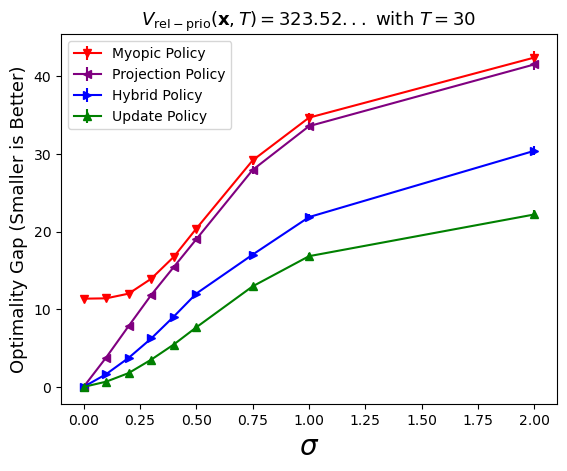

In [6]:
# Data
my_sigma = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]

myopic = [11.357676070885248, 11.401668532083704, 12.005599689895234, 13.92682047821421, 16.7393893696094, 20.37330959385332, 
          29.162374293247353, 34.65782484111173, 42.396547307764195]
myopic_ci = [0., 0.015496018275286056, 0.05334801905714205, 0.13651943488775112, 0.26226986034593697, 
             0.37805996400213815, 0.5828905111648925, 0.6615687497411535, 0.8489865804329587]

projection = [0., 3.779094662666239, 7.840320754324296, 11.834461835666616, 15.431781204237325, 19.006509927404068, 27.933999009688478, 33.56407740475231, 41.511058266218754]
projection_ci = [0., 0.09219906109427405, 0.17725997975822327, 0.23568836373341567, 0.30743313235919256, 0.38494369354128033, 0.4949934591449486, 0.5607304536386369, 0.7061441744074932]

hybrid = [0., 1.6416123472832282, 3.740784098840038, 6.232779010619595, 9.051675187668593, 12.015536928137521, 17.029235091532712,
         21.859185477967003, 30.39441103886213]
hybrid_ci = [0., 0.03762840532414709, 0.08864766490269418, 0.12516566921375472, 0.17526187465293427, 0.23493532374527396, 0.32251663156305277,
            0.4292526697277563, 0.5523747647466375]

update = [0., 0.6751724000587274, 1.785608100718548, 3.5096707400443847, 5.459479596568883, 7.670634010252172, 12.948077942456393, 16.82817815804907, 22.198738525815486]
update_ci = [0., 0.0284472199839743, 0.05978098879254324, 0.11913526304423622, 0.15754489654769221, 0.2150031057950384, 0.32913629277701, 0.3949186834446812, 0.5169044969707984]

# Create a new figure
plt.figure()

# Plot the data with error bars
plt.errorbar(my_sigma, myopic, yerr=myopic_ci, fmt='-v', label="Myopic Policy", color = "r")
plt.errorbar(my_sigma, projection, yerr=projection_ci, fmt='-<', label="Projection Policy", color = "purple")
plt.errorbar(my_sigma, hybrid, yerr=hybrid_ci, fmt='->', label="Hybrid Policy", color = "b")
plt.errorbar(my_sigma, update, yerr=update_ci, fmt='-^', label="Update Policy", color = "g")

# Label the axes and create a legend
plt.xlabel("$\sigma$", size=20)
plt.ylabel("Optimality Gap (Smaller is Better)", size=13)
plt.title("$V_{\mathrm{rel-prio}} (\mathbf{x},T) = 323.52...$ with $T=30$",size=13)
plt.legend()



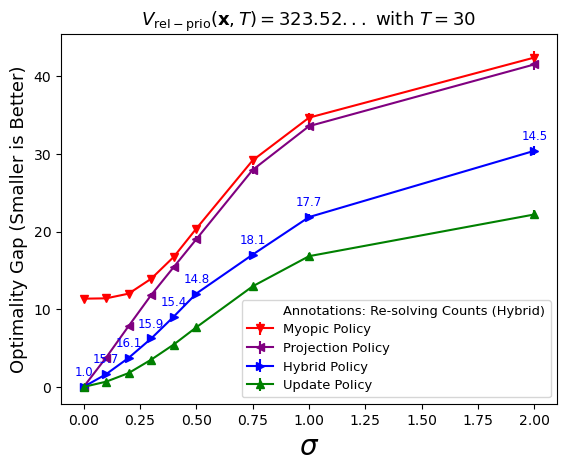

In [8]:
# Create a new figure
plt.figure()

# Plot the data with error bars

plt.errorbar(my_sigma, myopic, yerr=myopic_ci, fmt='-v', label="Myopic Policy", color = "r")
plt.errorbar(my_sigma, projection, yerr=projection_ci, fmt='-<', label="Projection Policy", color = "purple")
plt.errorbar(my_sigma, hybrid, yerr=hybrid_ci, fmt='->', label="Hybrid Policy", color = "b")
plt.errorbar(my_sigma, update, yerr=update_ci, fmt='-^', label="Update Policy", color = "g")

# Label the axes and create a legend
plt.xlabel("$\sigma$", size=20)
plt.ylabel("Optimality Gap (Smaller is Better)", size=13)
plt.title("$V_{\mathrm{rel-prio}} (\mathbf{x},T) = 323.52...$ with $T=30$",size=13)

# Annotate resolve times
resolve_times = [1., 15.7, 16.1, 15.9, 15.4, 14.8, 18.1, 17.7, 14.5]
for i, txt in enumerate(resolve_times):
    plt.annotate(txt, (my_sigma[i], hybrid[i]), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8.5, color="b")

# Create an empty plot element for the annotation legend entry
plt.plot([], [], ' ', label="Annotations: Re-solving Counts (Hybrid)")

# Create the legend
plt.legend(fontsize=9.4)

# Display the plot
#plt.show()
plt.savefig("perf-compare-3.pdf", bbox_inches='tight')